<a href="https://colab.research.google.com/github/gimangwai-tech/PENGOLAHAN-CITRA-DIGITAL-Semester-5/blob/main/Tugas7_FrekuensiDomain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

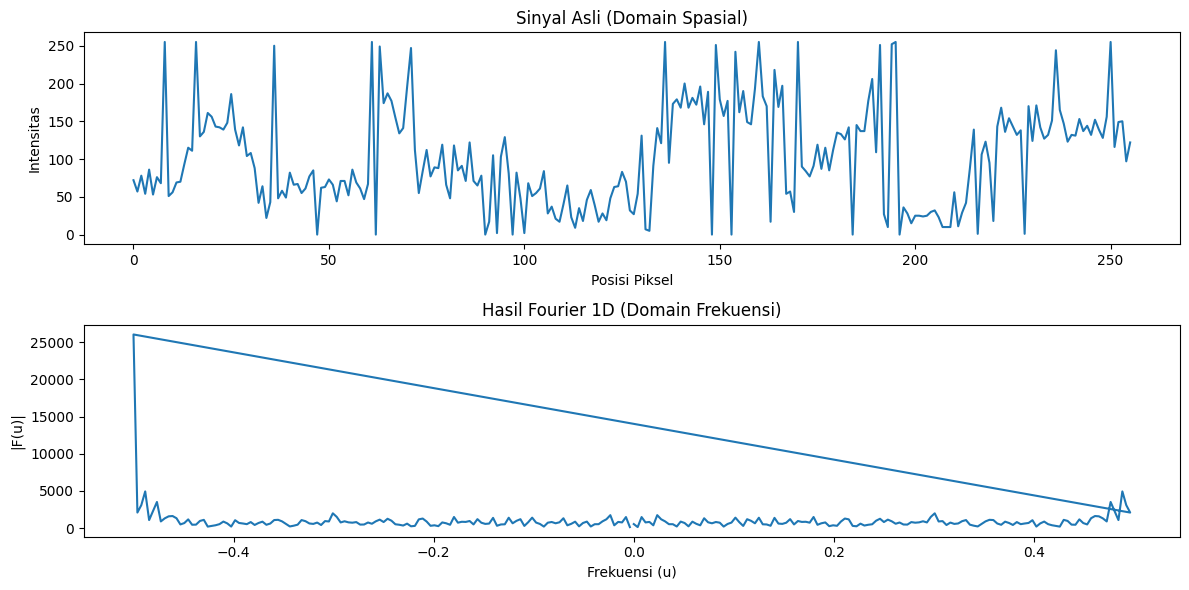

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 1. Baca gambar grayscale
img = cv2.imread('imgae_w_noise.png', 0)

# 2. Ambil satu baris (misal baris ke-100) sebagai sinyal 1D
row = img[100, :]   # sinyal spasial 1D

# 3. Lakukan Fourier Transform 1D
F = np.fft.fft(row)
Fshift = np.fft.fftshift(F)

# 4. Hitung magnitude spectrum
magnitude = np.abs(Fshift)
freq = np.fft.fftfreq(len(row))

# 5. Tampilkan hasil
plt.figure(figsize=(12,6))


plt.subplot(2,1,1)
plt.plot(row)
plt.title('Sinyal Asli (Domain Spasial)')
plt.xlabel('Posisi Piksel')
plt.ylabel('Intensitas')

plt.subplot(2,1,2)
plt.plot(freq, magnitude)
plt.title('Hasil Fourier 1D (Domain Frekuensi)')
plt.xlabel('Frekuensi (u)')
plt.ylabel('|F(u)|')
plt.tight_layout()
plt.show()

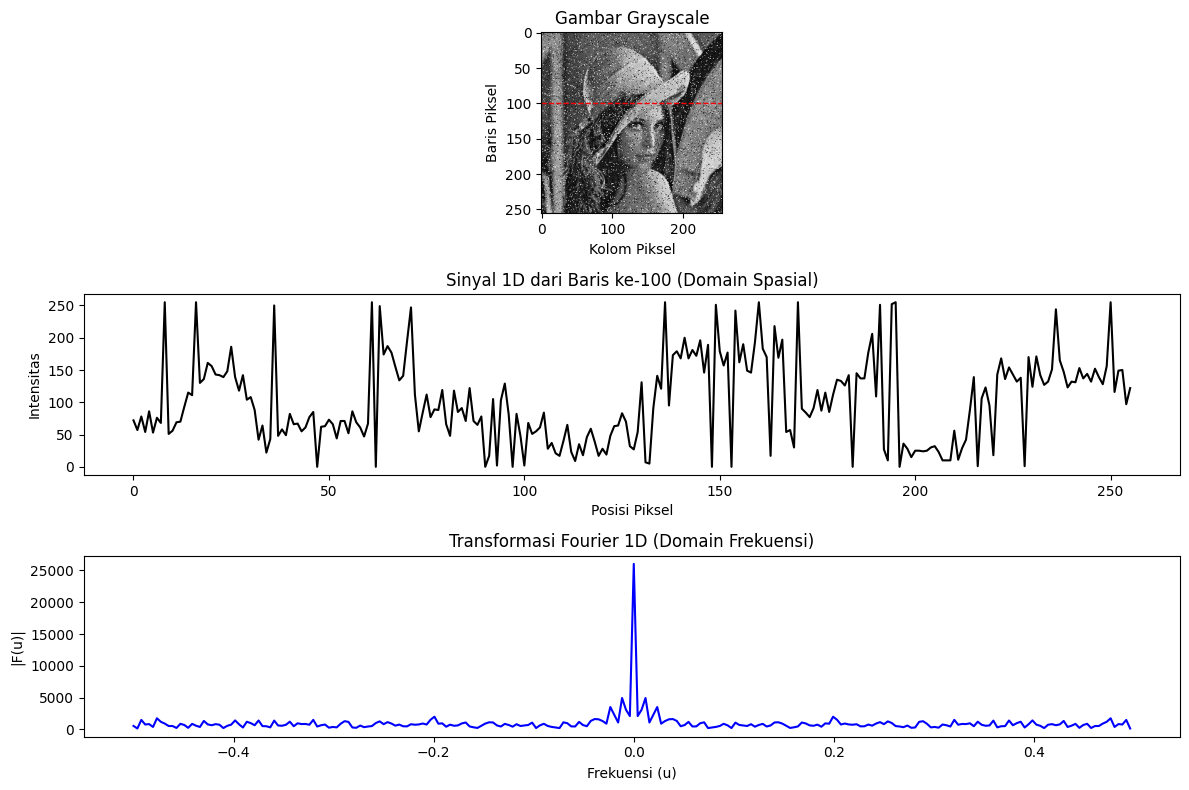

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 1. Baca gambar
img = cv2.imread('imgae_w_noise.png')   # pastikan file 'noise.png' ada di folder kerja
if img is None:
    raise FileNotFoundError("Gambar 'noise.png' tidak ditemukan!")

# 2. Ubah ke grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 3. Pilih satu baris gambar sebagai sinyal 1D (misalnya baris ke-100)
row_number = 100
row_signal = gray[row_number, :]

# 4. Lakukan Fourier Transform 1D
F = np.fft.fft(row_signal)
Fshift = np.fft.fftshift(F)
magnitude = np.abs(Fshift)
freq = np.fft.fftshift(np.fft.fftfreq(len(row_signal)))

# 5. Tampilkan hasil
plt.figure(figsize=(12, 8))

# Gambar grayscale
plt.subplot(3, 1, 1)
plt.imshow(gray, cmap='gray')
plt.title('Gambar Grayscale')
plt.xlabel('Kolom Piksel')
plt.ylabel('Baris Piksel')

# Garis horizontal yang diambil
plt.axhline(y=row_number, color='red', linestyle='--', linewidth=1)

# Sinyal 1D (domain spasial)
plt.subplot(3, 1, 2)
plt.plot(row_signal, color='black')
plt.title(f'Sinyal 1D dari Baris ke-{row_number} (Domain Spasial)')
plt.xlabel('Posisi Piksel')
plt.ylabel('Intensitas')

# Hasil Fourier (domain frekuensi)
plt.subplot(3, 1, 3)
plt.plot(freq, magnitude, color='blue')
plt.title('Transformasi Fourier 1D (Domain Frekuensi)')
plt.xlabel('Frekuensi (u)')
plt.ylabel('|F(u)|')

plt.tight_layout()
plt.show()


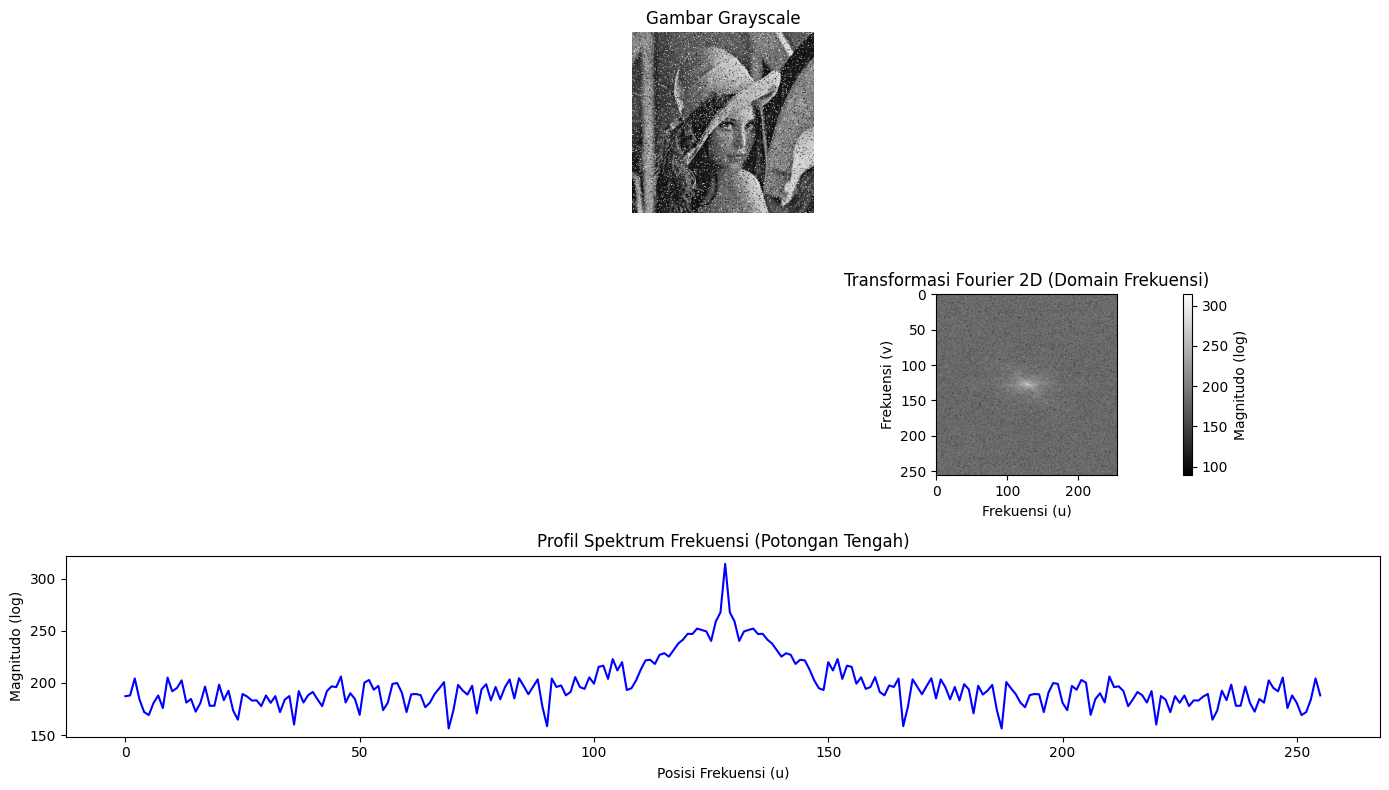

In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 1. Baca gambar
img = cv2.imread('imgae_w_noise.png')   # pastikan nama file benar
if img is None:
    raise FileNotFoundError("Gambar 'image_w_noise.png' tidak ditemukan!")

# 2. Ubah ke grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 3. Lakukan Transformasi Fourier 2D
F = np.fft.fft2(gray)
Fshift = np.fft.fftshift(F)
magnitude_spectrum = 20 * np.log(np.abs(Fshift) + 1)

# 4. Ambil profil frekuensi 1D dari tengah gambar (baris tengah)
center_row = magnitude_spectrum[magnitude_spectrum.shape[0] // 2, :]

# 5. Tampilkan hasil dalam bentuk grafik
plt.figure(figsize=(14, 8))

# Gambar grayscale
plt.subplot(3, 1, 1)
plt.imshow(gray, cmap='gray')
plt.title('Gambar Grayscale')
plt.axis('off')

# Spektrum Fourier 2D (domain frekuensi)
plt.subplot(3, 1, 2)
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Transformasi Fourier 2D (Domain Frekuensi)')
plt.xlabel('Frekuensi (u)')
plt.ylabel('Frekuensi (v)')
plt.colorbar(label='Magnitudo (log)')

# Profil 1D dari spektrum frekuensi (garis tengah)
plt.subplot(3, 1, 3)
plt.plot(center_row, color='blue')
plt.title('Profil Spektrum Frekuensi (Potongan Tengah)')
plt.xlabel('Posisi Frekuensi (u)')
plt.ylabel('Magnitudo (log)')

plt.tight_layout()
plt.show()


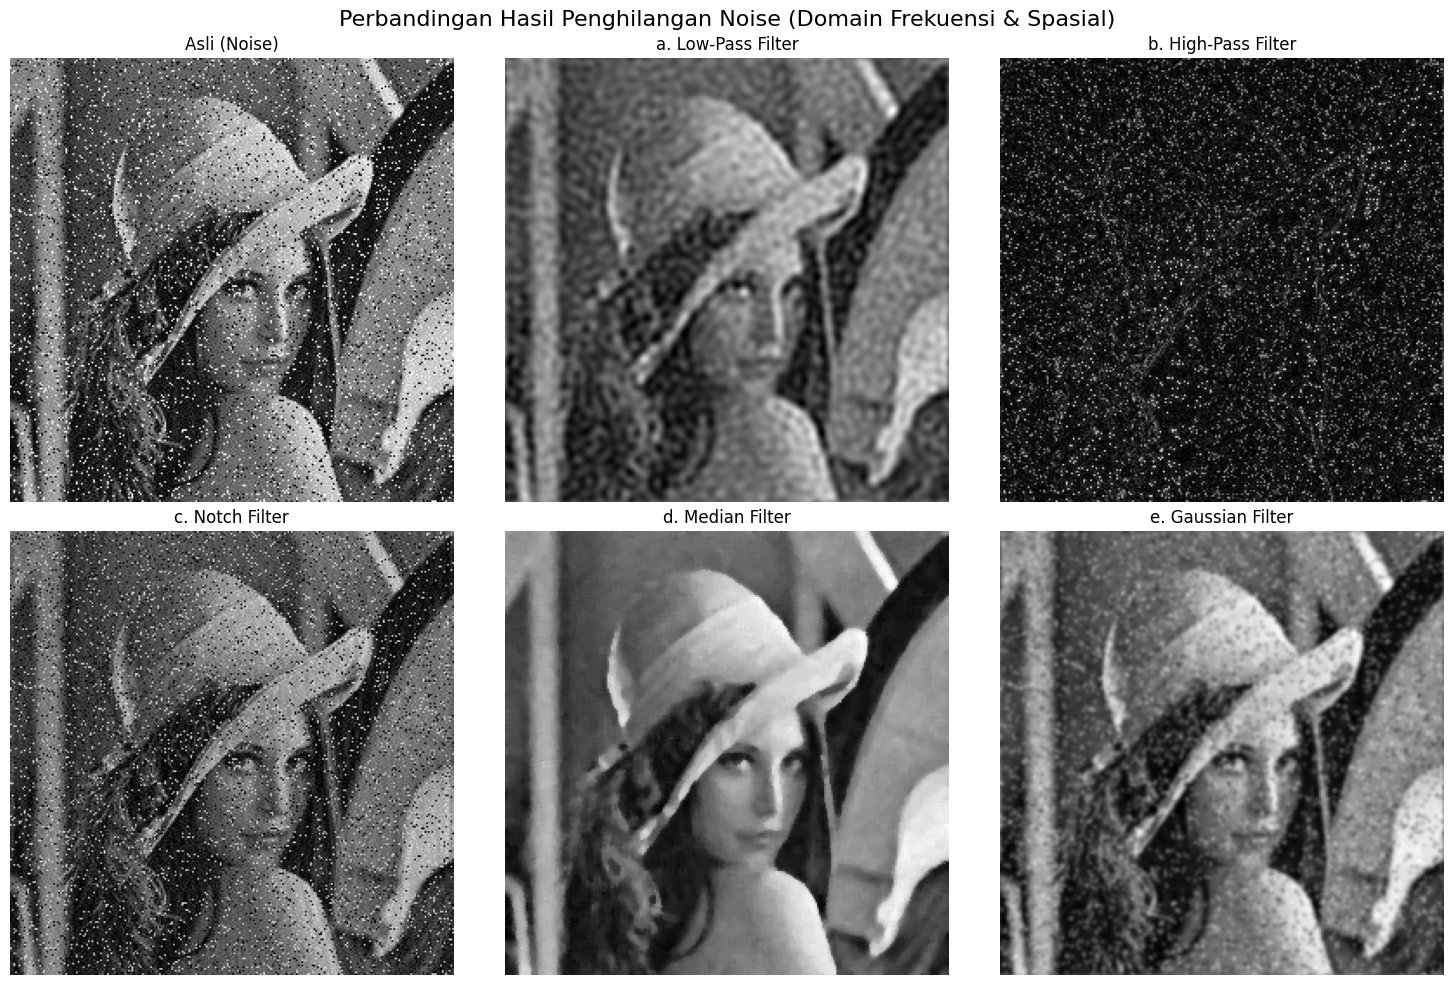

In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 1. Baca gambar dan ubah ke grayscale
img = cv2.imread('imgae_w_noise.png')
if img is None:
    raise FileNotFoundError("Gambar 'image_w_noise.png' tidak ditemukan!")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 2. Fourier Transform
F = np.fft.fft2(gray)
Fshift = np.fft.fftshift(F)
rows, cols = gray.shape
crow, ccol = rows // 2, cols // 2

# =========================================================
# a. LOW PASS FILTER
# =========================================================
mask_low = np.zeros((rows, cols), np.uint8)
r = 40  # radius cutoff
cv2.circle(mask_low, (ccol, crow), r, 1, thickness=-1)
F_low = Fshift * mask_low
img_low = np.fft.ifft2(np.fft.ifftshift(F_low))
img_low = np.abs(img_low)

# =========================================================
# b. HIGH PASS FILTER
# =========================================================
mask_high = np.ones((rows, cols), np.uint8)
cv2.circle(mask_high, (ccol, crow), r, 0, thickness=-1)
F_high = Fshift * mask_high
img_high = np.fft.ifft2(np.fft.ifftshift(F_high))
img_high = np.abs(img_high)

# =========================================================
# c. NOTCH FILTER (menghapus 2 titik frekuensi tertentu)
# =========================================================
mask_notch = np.ones((rows, cols), np.uint8)
d = 20
# Lokasi noise (misal di sekitar pusat ±50 pixel)
cv2.circle(mask_notch, (ccol + 50, crow), d, 0, -1)
cv2.circle(mask_notch, (ccol - 50, crow), d, 0, -1)
F_notch = Fshift * mask_notch
img_notch = np.fft.ifft2(np.fft.ifftshift(F_notch))
img_notch = np.abs(img_notch)

# =========================================================
# d. MEDIAN FILTER (spasial, bukan domain frekuensi)
# =========================================================
img_median = cv2.medianBlur(gray, 5)

# =========================================================
# e. GAUSSIAN FILTER (frekuensi)
# =========================================================
x = np.linspace(-ccol, ccol, cols)
y = np.linspace(-crow, crow, rows)
X, Y = np.meshgrid(x, y)
sigma = 40
gaussian_mask = np.exp(- (X**2 + Y**2) / (2 * sigma**2))
F_gauss = Fshift * gaussian_mask
img_gauss = np.fft.ifft2(np.fft.ifftshift(F_gauss))
img_gauss = np.abs(img_gauss)

# =========================================================
# Visualisasi Perbandingan
# =========================================================
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
plt.imshow(gray, cmap='gray')
plt.title('Asli (Noise)')
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(img_low, cmap='gray')
plt.title('a. Low-Pass Filter')
plt.axis('off')

plt.subplot(2, 3, 3)
plt.imshow(img_high, cmap='gray')
plt.title('b. High-Pass Filter')
plt.axis('off')

plt.subplot(2, 3, 4)
plt.imshow(img_notch, cmap='gray')
plt.title('c. Notch Filter')
plt.axis('off')

plt.subplot(2, 3, 5)
plt.imshow(img_median, cmap='gray')
plt.title('d. Median Filter')
plt.axis('off')

plt.subplot(2, 3, 6)
plt.imshow(img_gauss, cmap='gray')
plt.title('e. Gaussian Filter')
plt.axis('off')

plt.suptitle('Perbandingan Hasil Penghilangan Noise (Domain Frekuensi & Spasial)', fontsize=16)
plt.tight_layout()
plt.show()
